In [3]:
import matplotlib.pyplot as plt 
import dlib
import cv2
import numpy as np

In [7]:
def shape2normal(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords      
 
def align(image, gray, rect, predictor):
    shape = predictor(gray, rect)
    shape = shape2normal(shape)

    leftEyePts = shape[37 : 42]
    rightEyePts = shape[43 : 48]
 
    lCentre = leftEyePts.mean(axis = 0).astype("int")
    rCentre = rightEyePts.mean(axis = 0).astype("int")

    dX = rCentre[0] - lCentre[0]
    dY = rCentre[1] -lCentre[1]
 
    angle = np.degrees(np.arctan2(dY, dX))
    print("Angle : " + str(angle))

    desiredLeftEye = (0.35, 0.35)
    desiredFaceWidth = 256
    desiredFaceHeight = 256

    desiredRightEyeX = 1.0 - desiredLeftEye[0]

    dist = np.sqrt((dX**2) + (dY**2))

    desiredDist = (desiredRightEyeX - desiredLeftEye[0])
    desiredDist *= desiredFaceWidth

    scale = desiredDist / dist

    eyesCenter = ((lCentre[0] + rCentre[0])//2, (lCentre[1] + rCentre[1])//2)

    M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)

    tX = desiredFaceWidth * 0.5
    tY = desiredFaceHeight * desiredLeftEye[1]

    M[0, 2] += (tX - eyesCenter[0])
    M[1, 2] += (tY - eyesCenter[1])

    (w, h) = (desiredFaceWidth, desiredFaceHeight)

    output = cv2.warpAffine(image, M, (w, h), flags = cv2.INTER_CUBIC)

    return output


In [16]:
def show_images(image, face, aligned):
  fig = plt.figure(figsize = (20, 20))

  a = fig.add_subplot(1, 3, 1)
  img_plot = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  a.set_title("Original Image")
  
  a = fig.add_subplot(1, 3, 2)
  img_plot = plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
  a.set_title("Detected Face")

  a = fig.add_subplot(1, 3, 3)
  img_plot = plt.imshow(cv2.cvtColor(aligned, cv2.COLOR_BGR2RGB))
  a.set_title("Aligned Face")

  plt.show()

Angle : -9.260221531171478


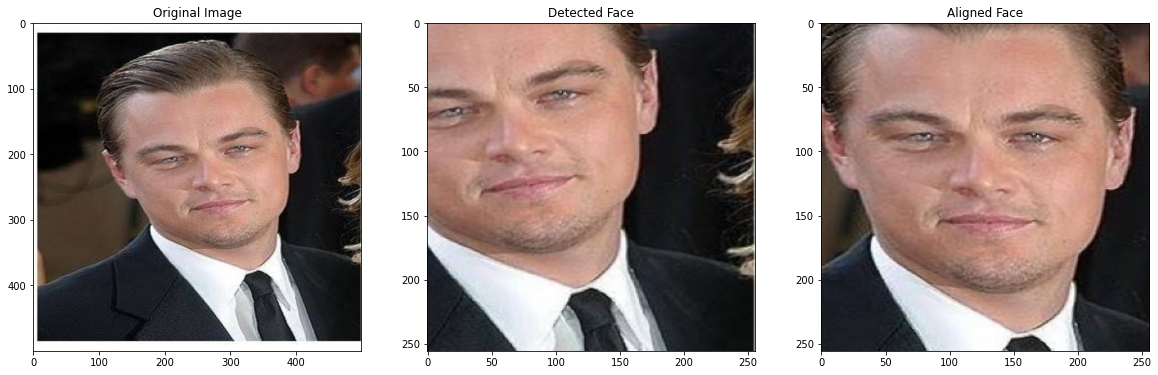

In [17]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/My Drive/shape_predictor_68_face_landmarks.dat')
 
image = cv2.imread('leonardo1.jpeg')
image = cv2.resize(image, (500, 500))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
rects = detector(gray, 2)

if len(rects) > 0:
  for rect in rects:
    x = rect.left()
    y = rect.top()
    w = rect.right()
    h = rect.bottom()  

    face = image[y:y+h, x:x+w]
    face = cv2.resize(face, (256, 256))

    aligned = align(image, gray, rect, predictor)

show_images(image, face, aligned)